In [1]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import fdasrsf as fs
import numpy as np
import json

In [2]:
df = scipy.io.loadmat('TremorStruct_V1_Joint_Severity_Constancy_After_Exclusion.mat')

In [3]:
print(df.keys())

dict_keys(['__header__', '__version__', '__globals__', 'TremorStruct', '__function_workspace__'])


In [4]:
var = df['TremorStruct'][0]
pat_number = len(var)
pat_number

160

In [5]:
data = {}
for i in range(pat_number):
    data_pat = var[i]
    data[str(i)]=data_pat[17][0,0][0][:,:]
    
day1to4_pat0 = data['0'][:,:4]

# SMOOTHING

In [6]:
from pykalman import KalmanFilter

In [12]:
kf = KalmanFilter(transition_matrices=np.eye(4),transition_covariance=10000*np.eye(4),
                  observation_matrices=np.eye(4),observation_covariance=10000*np.eye(4))
kf = kf.em(day1to4_pat0[:,:4])

In [13]:
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(day1to4_pat0[:,:4])

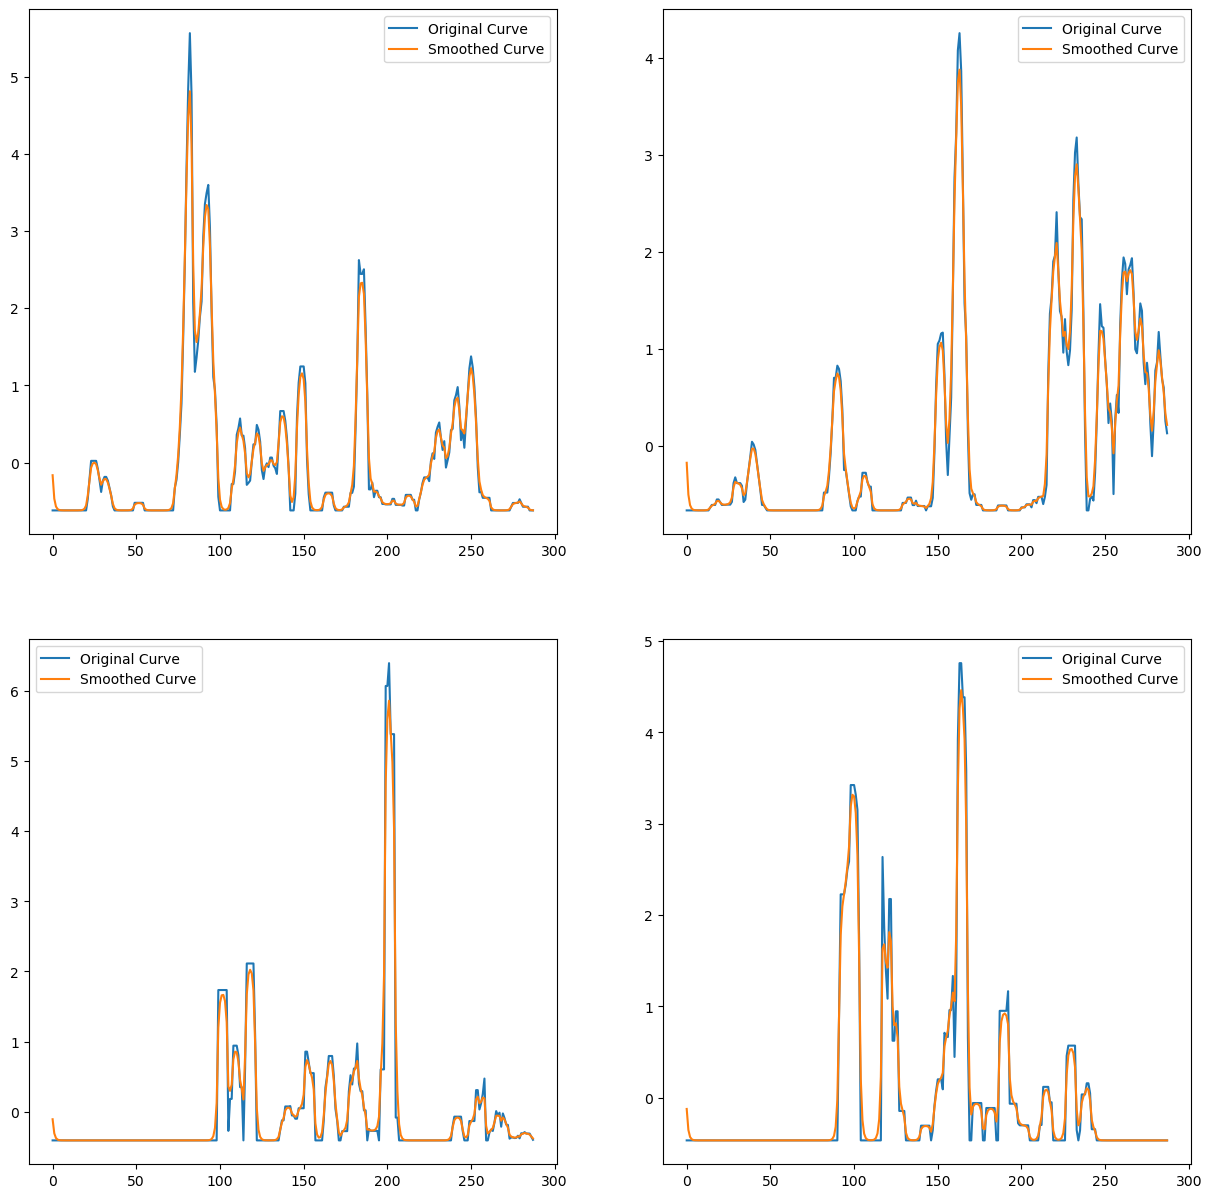

In [14]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
ax[0,0].plot(day1to4_pat0[:,0],label='Original Curve')
ax[0,0].plot(smoothed_state_means[:,0],label='Smoothed Curve')
ax[0,0].legend()
ax[0,1].plot(day1to4_pat0[:,1],label='Original Curve')
ax[0,1].plot(smoothed_state_means[:,1],label='Smoothed Curve')
ax[0,1].legend()
ax[1,0].plot(day1to4_pat0[:,2],label='Original Curve')
ax[1,0].plot(smoothed_state_means[:,2],label='Smoothed Curve')
ax[1,0].legend()
ax[1,1].plot(day1to4_pat0[:,3],label='Original Curve')
ax[1,1].plot(smoothed_state_means[:,3],label='Smoothed Curve')
ax[1,1].legend()

# ALIGNMENT

In [15]:
time = np.arange(smoothed_state_means.shape[0]).astype(np.float64)
obj = fs.fdawarp(smoothed_state_means.astype(np.float64), time)

obj.srsf_align(parallel=True)

Initializing...
Compute Karcher Mean of 4 function in SRSF space with lam=0.000000
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


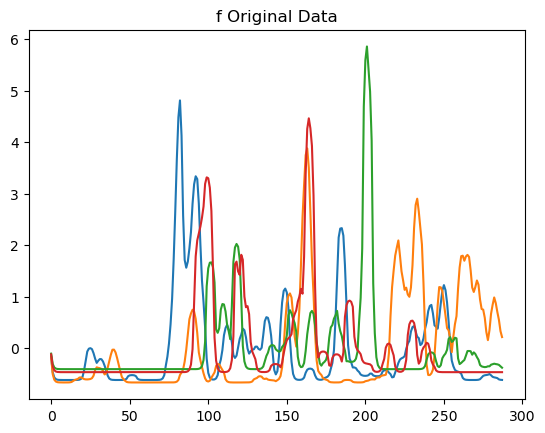

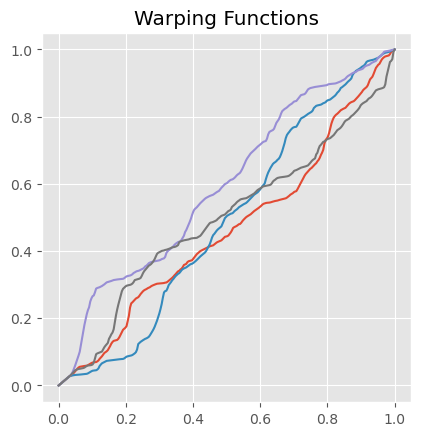

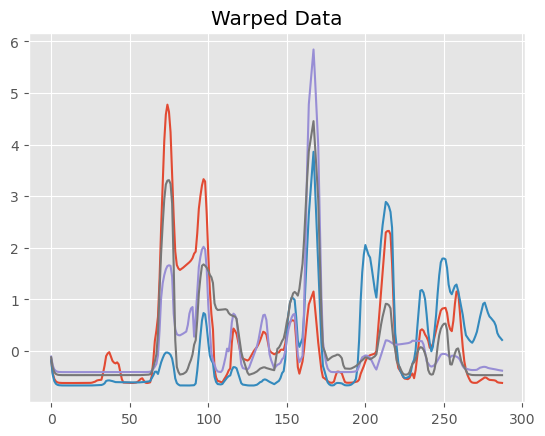

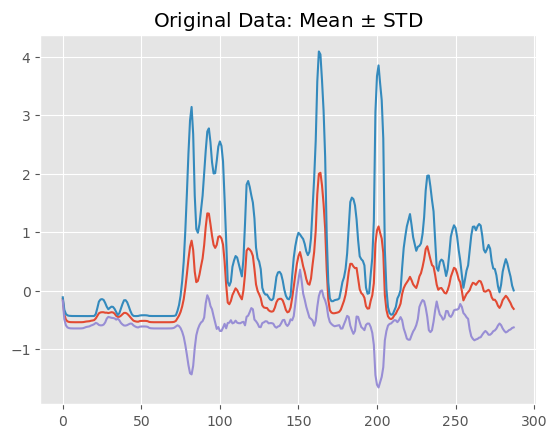

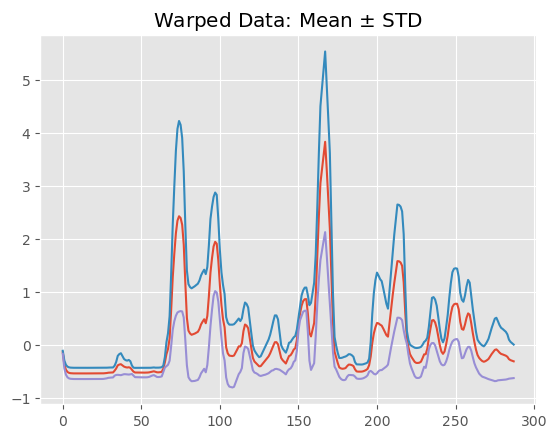

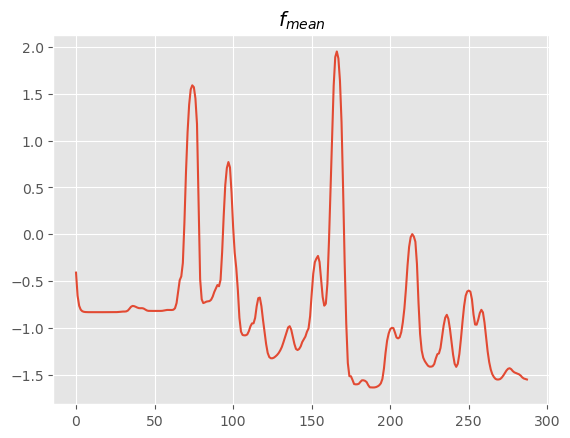

In [16]:
obj.plot()